In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [2]:
aisles = pd.read_csv('aisles.csv')
print(aisles.head(5))
print(aisles.shape)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
(134, 2)


In [3]:
departments = pd.read_csv('departments.csv')
print(departments.head(5))
print(departments.shape)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
(21, 2)


In [4]:
orders_prior = pd.read_csv('order_products__prior.csv')
print(orders_prior.head(5))
print(orders_prior.shape)

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
(32434489, 4)


In [5]:
orders_train = pd.read_csv('order_products__train.csv')
print(orders_train.head(5))
print(orders_train.shape)

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
(1384617, 4)


In [6]:
orders = pd.read_csv('orders.csv')
print(orders.head(5))
print(orders.shape)

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
(3421083, 7)


In [7]:
products = pd.read_csv('products.csv')
print(products.head(5))
print(products.shape)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
(49688, 4)


# Cleaning the data

In [8]:
# Detecting missing values
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [9]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [10]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [11]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
orders[orders.days_since_prior_order.isnull() == True].head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
50,2086598,6,prior,1,5,18,NaN
54,2565571,7,prior,1,3,9,NaN
75,600894,8,prior,1,6,0,NaN
79,280530,9,prior,1,1,17,NaN
83,1224907,10,prior,1,2,14,NaN


All the NaN values in "days_since_prior_order" in orders table are associated with the first order of users. I will replace the NaN by zeros. Below the proof, there is not an entry different from first order which has NaN associated in "days_since_prior_order".

In [13]:
orders[(orders.order_number != 1) & (orders.days_since_prior_order.isnull() == True)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [14]:
# Replacing NaN with zero
print(orders.isnull().sum())
orders.days_since_prior_order.fillna(value=0, inplace=True)
print(orders.isnull().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [15]:
orders_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [16]:
orders_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [17]:
# no duplicates
dataframes = [aisles, departments, products, orders, orders_prior, orders_train]

for dataframe in dataframes:
    print(dataframe.duplicated().sum())

0
0
0
0
0
0


# Exploration and Data Analysis

In [18]:
#aisles, departments, products, orders, orders_train, orders_prior

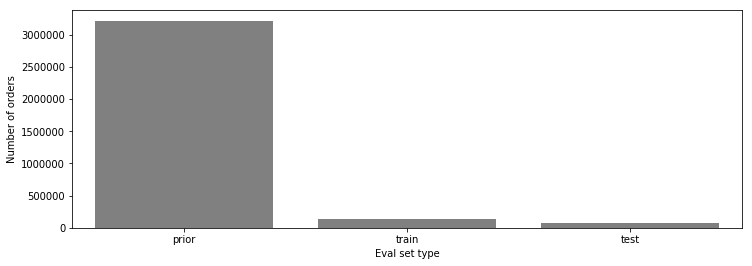

In [19]:
eval_count = orders.eval_set.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(eval_count.index, eval_count.values, color='gray')
plt.ylabel('Number of orders')
plt.xlabel('Eval set type')
plt.show()

In [20]:
# We have 134 aisles
print('aisles: ',aisles.shape[0])

aisles:  134


In [21]:
# We have 21 departments
print('departments: ',departments.shape[0])

departments:  21


In [22]:
# We have close to 50'000 products
print('Products: ',products.shape[0])

Products:  49688


In [23]:
# We have close to 3.5 million orders
print('orders: ',orders.shape[0])

orders:  3421083


In [24]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
# around 206'000 distinct users
orders.user_id.nunique()

206209

In [26]:
# our regular customers had a maximum of 100 orders while the minimum had 4 orders
orders.order_id.groupby(orders.user_id).count().sort_values(ascending=False)

user_id
26086     100
120897    100
122476    100
31118     100
1868      100
138283    100
24609     100
115423    100
157667    100
24562     100
143099    100
170771    100
170746    100
24531     100
203027    100
143118    100
5296      100
143121    100
203020    100
91957     100
42711     100
149567    100
57367     100
57130     100
190983    100
24659     100
24766     100
102666    100
198217    100
190887    100
         ... 
74044       4
192359      4
74136       4
74138       4
74185       4
160523      4
22399       4
74214       4
160529      4
160533      4
160535      4
22409       4
192378      4
160542      4
160545      4
74189       4
160552      4
74146       4
192371      4
74181       4
192369      4
74179       4
74177       4
74175       4
160558      4
74171       4
160560      4
160570      4
74147       4
127633      4
Name: order_id, Length: 206209, dtype: int64

In [27]:
orders.shape

(3421083, 7)

In [28]:
products.pivot_table(index=['department_id', 'aisle_id'], aggfunc = 'count')

product_id  product_name
department_id aisle_id                          
1             34               229           229
              37              1091          1091
              38               880           880
              42               189           189
              52               296           296
              58                81            81
              79               335           335
              113               47            47
              116              361           361
              119              112           112
              129              386           386
2             6                548           548
3             8                297           297
              43               195           195
              93               226           226
              112              557           557
              128              241           241
4             16                86            86
              24               382           382
              32                32            32
              83               569           569
              123              615           615
5             27               385           385
              28               232           232
              62               147           147
              124              195           195
              134               95            95
6             30               257           257
              33               169           169
              66               605           605
...                            ...           ...
17            54               322           322
              60               112           112
              74               204           204
              75               506           506
              85               206           206
              87               308           308
              101              355           355
              111              199           199
              114              655           655
18            56               187           187
              82                44            44
              92               718           718
              102              132           132
19            3                832           832
              23               316           316
              45              1246          1246
              46               168           168
              50               356           356
              61               874           874
              78               747           747
              103               85            85
              107              989           989
              117              582           582
              125               69            69
20            1                146           146
              13               317           317
              14               159           159
              67               327           327
              96               373           373
21            100             1258          1258

[134 rows x 2 columns]

In [29]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
departments.shape

(21, 2)

In [31]:
for d in range(22):
    print(departments.department[departments.department_id ==d],products[products.department_id == d].count()[0])

Series([], Name: department, dtype: object) 0
0    frozen
Name: department, dtype: object 4007
1    other
Name: department, dtype: object 548
2    bakery
Name: department, dtype: object 1516
3    produce
Name: department, dtype: object 1684
4    alcohol
Name: department, dtype: object 1054
5    international
Name: department, dtype: object 1139
6    beverages
Name: department, dtype: object 4365
7    pets
Name: department, dtype: object 972
8    dry goods pasta
Name: department, dtype: object 1858
9    bulk
Name: department, dtype: object 38
10    personal care
Name: department, dtype: object 6563
11    meat seafood
Name: department, dtype: object 907
12    pantry
Name: department, dtype: object 5371
13    breakfast
Name: department, dtype: object 1115
14    canned goods
Name: department, dtype: object 2092
15    dairy eggs
Name: department, dtype: object 3449
16    household
Name: department, dtype: object 3085
17    babies
Name: department, dtype: object 1081
18    snacks
Name: depar

In [32]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


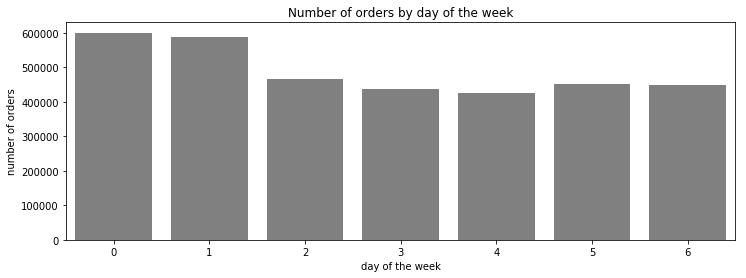

In [33]:
# number of orders across days of week
plt.figure(figsize = (12,4))
sns.countplot(x='order_dow', data = orders, color='gray')
plt.ylabel('number of orders')
plt.xlabel('day of the week')
plt.title('Number of orders by day of the week')
plt.show()

It seems the most popular days for reordering are 0,1. Does this represent the weekend?
Can we do an hypothesis test?

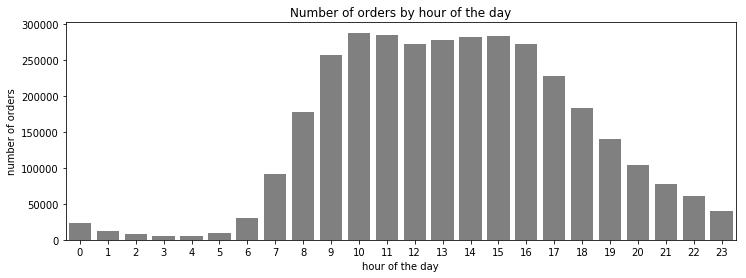

In [34]:
# number of orders across hours of day
plt.figure(figsize = (12,4))
sns.countplot(x='order_hour_of_day', data = orders, color='gray')
plt.ylabel('number of orders')
plt.xlabel('hour of the day')
plt.title('Number of orders by hour of the day')
plt.show()

In [35]:
# create a plot like this for every day of the week

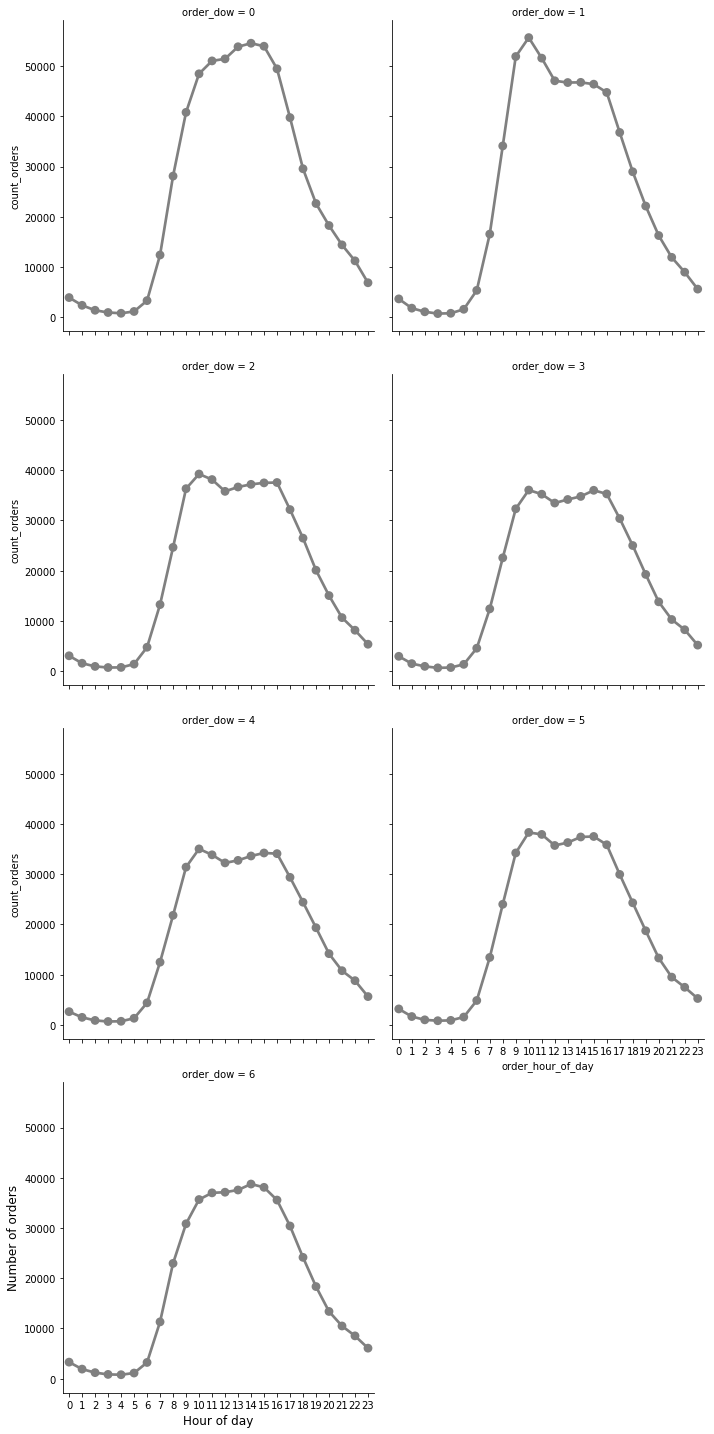

In [36]:
grouped_1 = pd.DataFrame(orders.groupby(['order_dow','order_hour_of_day'])
                          .agg({'order_id':pd.Series.nunique})
                          .rename(columns={'order_id':'count_orders'})).reset_index()
plt.close('all')
sns.factorplot(x="order_hour_of_day", y="count_orders",
               col="order_dow", data=grouped_1, color='gray',col_wrap=2,size=5);

plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.show()

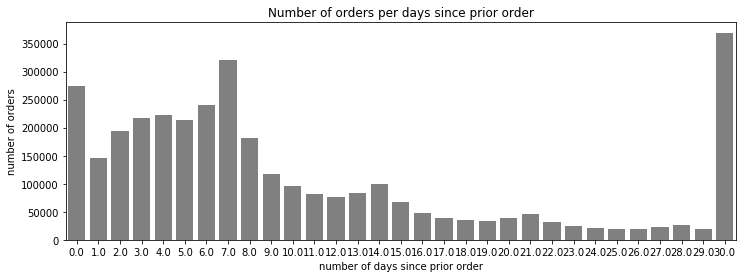

In [37]:
# number of days since prior order
plt.figure(figsize = (12,4))
sns.countplot(x='days_since_prior_order', data = orders, color='gray')
plt.ylabel('number of orders')
plt.xlabel('number of days since prior order')
plt.title('Number of orders per days since prior order')
plt.show()

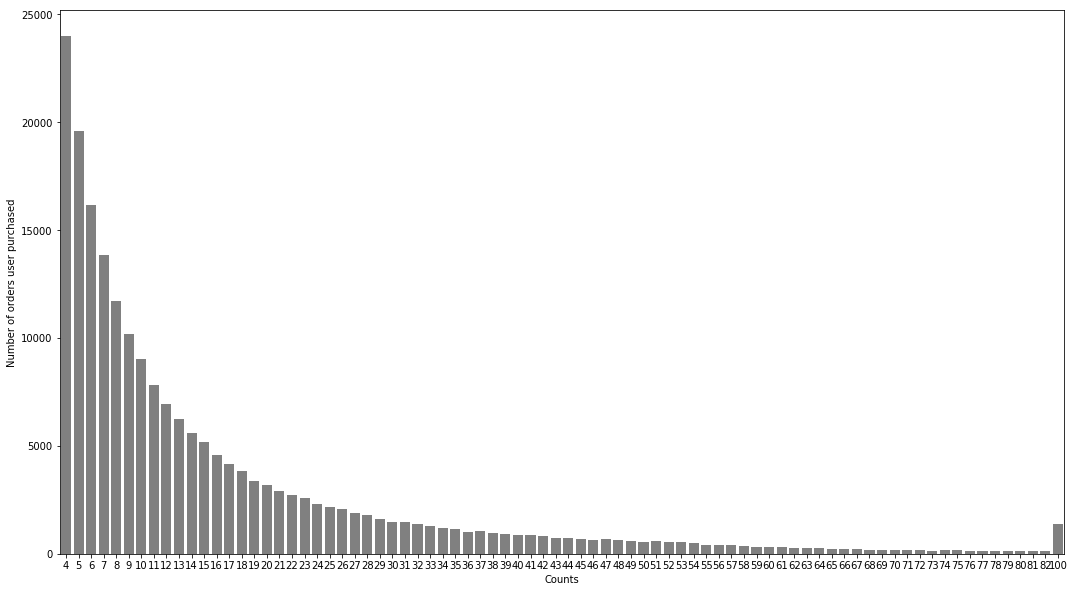

In [38]:
#order history length
order_length_count = orders.groupby('user_id')['order_number'].aggregate(max).value_counts()
cut_off = 80
f, ax = plt.subplots(figsize=(18, 10))
sns.barplot(order_length_count.index[:cut_off], order_length_count.values[:cut_off], color='gray')
plt.ylabel('Number of orders user purchased')
plt.xlabel('Counts')
plt.show()

In [39]:
print('Average number of orders for users:{}'.format(
    orders.groupby('user_id')['order_number'].aggregate(max).mean()))

Average number of orders for users:16.590367054784224


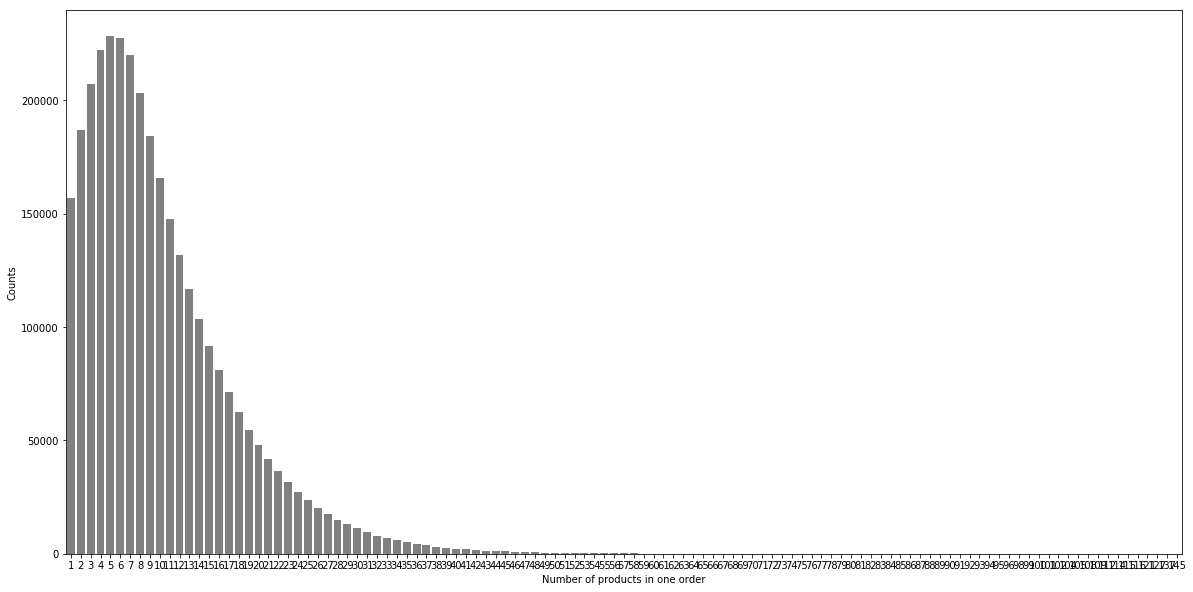

In [40]:
#basket size histogram
basket_size_count = orders_prior.groupby('order_id')['add_to_cart_order'].aggregate(max).value_counts()

f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(basket_size_count.index, basket_size_count.values, color='gray')
plt.ylabel('Counts')
plt.xlabel('Number of products in one order')
plt.show()

In [41]:
print('Average basket size:{}'.format(
    orders_prior.groupby('order_id')['add_to_cart_order'].aggregate(max).mean()))

Average basket size:10.088883421247614


In [42]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [43]:
# join dataframes
products_combined = pd.merge(pd.merge(products, departments),aisles)

In [44]:
products_combined.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [45]:
products_combined.department.groupby(products_combined.department).count()

department
alcohol            1054
babies             1081
bakery             1516
beverages          4365
breakfast          1115
bulk                 38
canned goods       2092
dairy eggs         3449
deli               1322
dry goods pasta    1858
frozen             4007
household          3085
international      1139
meat seafood        907
missing            1258
other               548
pantry             5371
personal care      6563
pets                972
produce            1684
snacks             6264
Name: department, dtype: int64

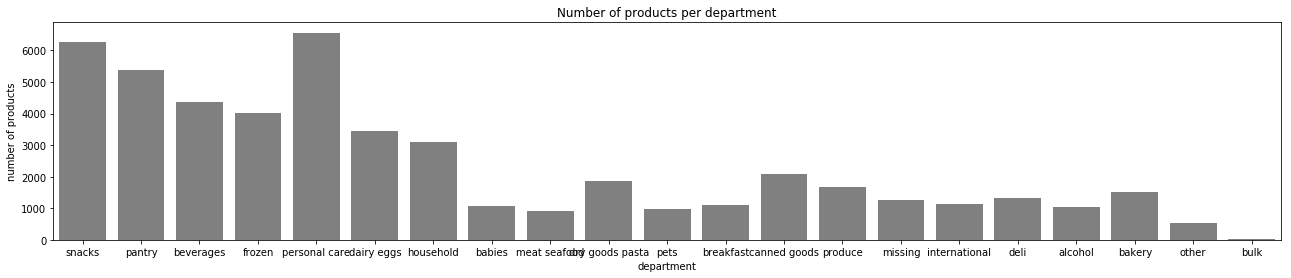

In [46]:
# number of products per department
plt.figure(figsize = (22,4))
sns.countplot(x='department', data = products_combined, color='gray')
plt.ylabel('number of products')
plt.xlabel('department')
plt.title('Number of products per department')
plt.show()

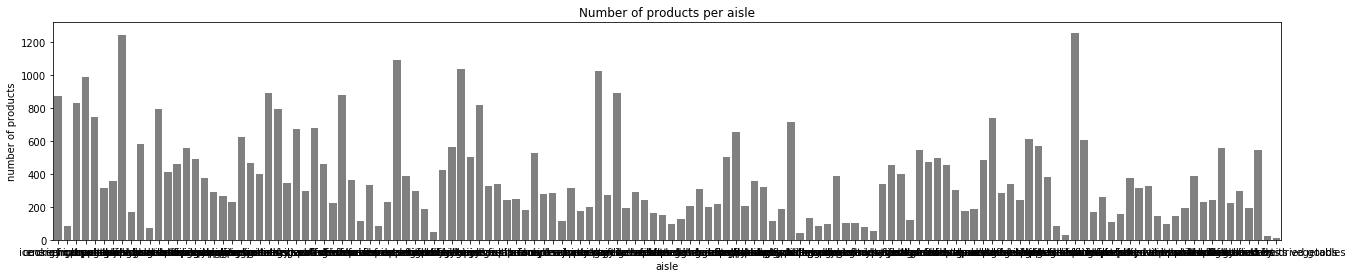

In [47]:
# number of products per aisle
plt.figure(figsize = (22,4))
sns.countplot(x='aisle', data = products_combined, color='gray')
plt.ylabel('number of products')
plt.xlabel('aisle')
plt.title('Number of products per aisle')
plt.show()

In [48]:
products_combined.aisle.groupby(products_combined.aisle).count().sort_values(ascending = False).tail(10)

aisle
poultry counter                 82
frozen breads doughs            81
packaged seafood                80
trail mix snack mix             69
seafood counter                 54
frozen juice                    47
baby accessories                44
packaged produce                32
bulk grains rice dried goods    26
bulk dried fruits vegetables    12
Name: aisle, dtype: int64

In [49]:
products_combined[products_combined.aisle == 'missing'].head(20)

,product_id,product_name,aisle_id,department_id,department,aisle
42813,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
42814,72,Organic Honeycrisp Apples,100,21,missing,missing
42815,110,Uncured Turkey Bologna,100,21,missing,missing
42816,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
42817,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
42818,437,Strawberry Cheesecake Nonfat Yogurt,100,21,missing,missing
42819,440,Crossovers Olive Thyme Almond,100,21,missing,missing
42820,472,Fancy Diced Hot Chilies,100,21,missing,missing
42821,491,Pompelmo Water,100,21,missing,missing
42822,556,Bake & Break Cheese Garlic Loaf,100,21,missing,missing


# Combining dataframes

We already have products combined

In [50]:
products_combined.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [51]:
orders.shape

(3421083, 7)

In [52]:
#aisles, departments, products, orders, orders_train, orders_prior
orders_train.shape[0]

1384617

In [53]:
#aisles, departments, products, orders, orders_train, orders_prior
orders_prior.shape[0]

32434489

In [54]:
orders_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [55]:
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [56]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [57]:
products_combined.shape

(49688, 6)

In [58]:
# combine orders and orders_prior dataframes
orders_combined_1 = pd.merge(orders, orders_prior, on = 'order_id', how = 'inner')

In [59]:
orders_combined_1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196,1,0
1,2539329,1,prior,1,2,8,0.0,14084,2,0
2,2539329,1,prior,1,2,8,0.0,12427,3,0
3,2539329,1,prior,1,2,8,0.0,26088,4,0
4,2539329,1,prior,1,2,8,0.0,26405,5,0


In [60]:
print(orders_combined_1.shape)

(32434489, 10)


In [61]:
# combine orders and orders_train dataframes
orders_combined_2 = pd.merge(orders, orders_train, on = 'order_id', how = 'inner')
orders_combined_2.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [62]:
print(orders_combined_2.shape)

(1384617, 10)


In [63]:
# combine orders and products combined -- get the labels
prioralldata = pd.merge(orders_combined_1, products_combined, on = 'product_id', how = 'inner')
prioralldata.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks


In [64]:
prioralldata.shape

(32434489, 15)

In [65]:
# Top 10 products

tmp_1 = pd.DataFrame(prioralldata.groupby(['product_name']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_prod'})).reset_index()

top_10_prod = tmp_1.nlargest(10,'count_prod')['product_name']

In [66]:
top_10_prod

3676                     Banana
3471     Bag of Organic Bananas
31920      Organic Strawberries
28840      Organic Baby Spinach
30297      Organic Hass Avocado
28804           Organic Avocado
22413               Large Lemon
42904              Strawberries
23420                     Limes
32478        Organic Whole Milk
Name: product_name, dtype: object

In [67]:
# Top 10 departments

tmp_2 = pd.DataFrame(prioralldata.groupby(['department']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_dep'})).reset_index()

top_10_dep = tmp_2.nlargest(10,'count_dep')['department']

top_10_dep

19            produce
7          dairy eggs
3           beverages
20             snacks
10             frozen
16             pantry
2              bakery
8                deli
6        canned goods
9     dry goods pasta
Name: department, dtype: object

In [68]:
# Top 10 aisles

tmp_3 = pd.DataFrame(prioralldata.groupby(['aisle']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_aisles'})).reset_index()

top_10_aisle = tmp_3.nlargest(10,'count_aisles')['aisle']

top_10_aisle

50                      fresh fruits
53                  fresh vegetables
98        packaged vegetables fruits
133                           yogurt
83                              milk
93                   packaged cheese
131    water seltzer sparkling water
119                  soy lactosefree
25                    chips pretzels
11                             bread
Name: aisle, dtype: object

In [69]:
# produce plots


In [70]:
# plot showing the products per hour of day
prioralldata.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks


In [71]:
grouped_2 = prioralldata.groupby(['order_hour_of_day', 'product_name' ],as_index= False)[['order_id']].count()

In [72]:
grouped_2[grouped_2.order_hour_of_day == 0].sort_values(by = 'order_id', ascending = False).head(6)

,order_hour_of_day,product_name,order_id
1511,0,Banana,2815
1418,0,Bag of Organic Bananas,2712
14483,0,Organic Strawberries,1839
12507,0,Organic Baby Spinach,1768
13445,0,Organic Hass Avocado,1398
12479,0,Organic Avocado,1176


In [73]:
# keeping the maximum values
grouped_2.loc[grouped_2.groupby(['order_hour_of_day'])['order_id'].idxmax()]

,order_hour_of_day,product_name,order_id
1511,0,Banana,2815
23510,1,Banana,1398
41385,2,Banana,820
55882,3,Banana,589
68873,4,Banana,686
81899,5,Banana,1315
98037,6,Banana,4778
122091,7,Banana,14527
154712,8,Banana,27420
192707,9,Banana,37980


In [74]:
# interesting result...banana is the most popular product ordered at any hour of day
# what if we exclude bananas

In [75]:
grouped_df = prioralldata.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df.head()

,order_dow,order_hour_of_day,reordered
0,0,0,0.576500
1,0,1,0.551792
2,0,2,0.552299
3,0,3,0.569427
4,0,4,0.546584


In [76]:
grouped_df = grouped_df.pivot(index='order_dow', columns = 'order_hour_of_day', values = 'reordered')
grouped_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,0.576500,0.551792,0.552299,0.569427,0.546584,0.593242,0.622488,0.639452,0.626547,0.607529,...,0.575292,0.578199,0.575274,0.570007,0.572861,0.581956,0.595262,0.607195,0.598639,0.598127
1,0.588969,0.593080,0.558103,0.573517,0.596377,0.626057,0.659062,0.671571,0.661973,0.651143,...,0.589955,0.583087,0.579219,0.579604,0.573547,0.570348,0.577493,0.581970,0.577404,0.577420
2,0.564385,0.558086,0.563857,0.578850,0.562776,0.611107,0.640177,0.642603,0.632893,0.621903,...,0.582838,0.579452,0.582815,0.572966,0.573171,0.573782,0.566664,0.580164,0.571384,0.574567
3,0.552116,0.536828,0.539695,0.549420,0.553363,0.604140,0.631227,0.642687,0.621007,0.612894,...,0.573512,0.580905,0.577994,0.578211,0.575737,0.575770,0.578691,0.581080,0.584147,0.569541
4,0.557992,0.538137,0.545808,0.559874,0.582984,0.604880,0.638653,0.636844,0.623302,0.608692,...,0.584057,0.585931,0.584787,0.586410,0.583329,0.581323,0.592181,0.595131,0.583407,0.570399


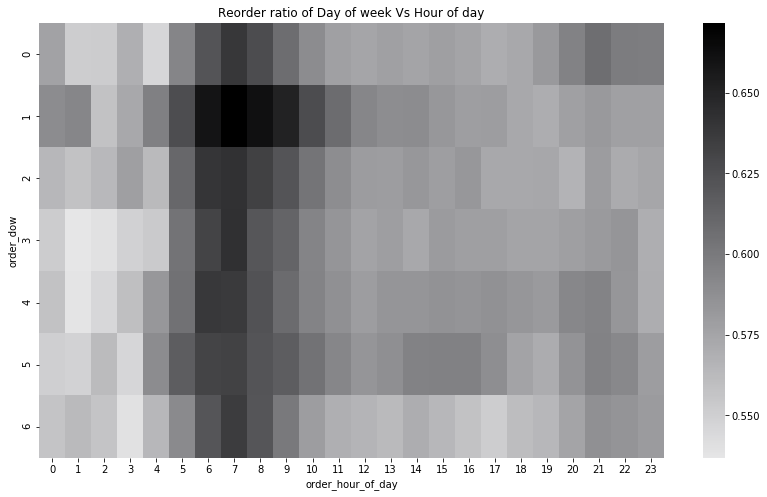

In [77]:
plt.figure(figsize=(14,8))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(grouped_df, cmap=cmap)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

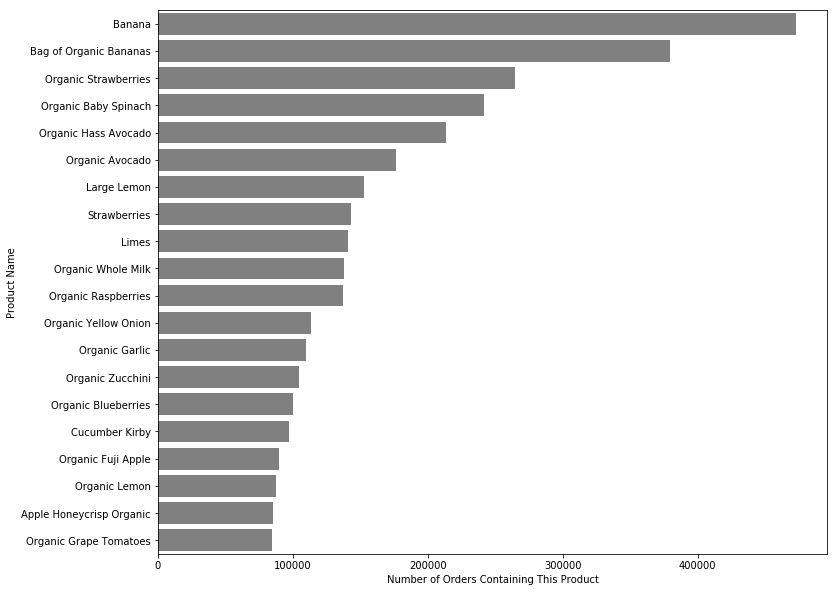

In [78]:
# popularity of the products
top_products = prioralldata['product_name'].value_counts().reset_index().head(20)
top_products.columns = ['product_name', 'frequency_count']


f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='horizontal')
sns.barplot(top_products.frequency_count, top_products.product_name, color = 'gray')
plt.ylabel('Product Name')
plt.xlabel('Number of Orders Containing This Product')
plt.show()

In [79]:
product_info = prioralldata.groupby('product_id')['reordered', 'order_id'].aggregate(
    {'reordered': sum, 'order_id': len})

product_info.rename(columns={'order_id': 'order_count'}, inplace = True)

product_info.head()

,reordered,order_count
product_id,,
1,1136,1852
2,12,90
3,203,277
4,147,329
5,9,15


In [80]:
product_info['reorder_rate'] = product_info.reordered/product_info.order_count
product_info.head()

,reordered,order_count,reorder_rate
product_id,,,
1,1136,1852,0.613391
2,12,90,0.133333
3,203,277,0.732852
4,147,329,0.446809
5,9,15,0.600000


In [81]:
high_reorder = product_info[product_info.order_count > 100].sort_values('reorder_rate', ascending = False)
high_reorder.head()

,reordered,order_count,reorder_rate
product_id,,,
27740,93,101,0.920792
38251,99,111,0.891892
10236,113,129,0.875969
20598,98,112,0.875000
35496,389,451,0.862528


In [82]:
products.set_index('product_id', inplace = True)
high_reorder = high_reorder.join(products)
high_reorder.head()

,reordered,order_count,reorder_rate,product_name,aisle_id,department_id
product_id,,,,,,
27740,93,101,0.920792,Chocolate Love Bar,45,19
38251,99,111,0.891892,Benchbreak Chardonnay,62,5
10236,113,129,0.875969,Fragrance Free Clay with Natural Odor Eliminat...,41,8
20598,98,112,0.875000,Thousand Island Salad Snax,50,19
35496,389,451,0.862528,Real2 Alkalized Water 500 ml,115,7


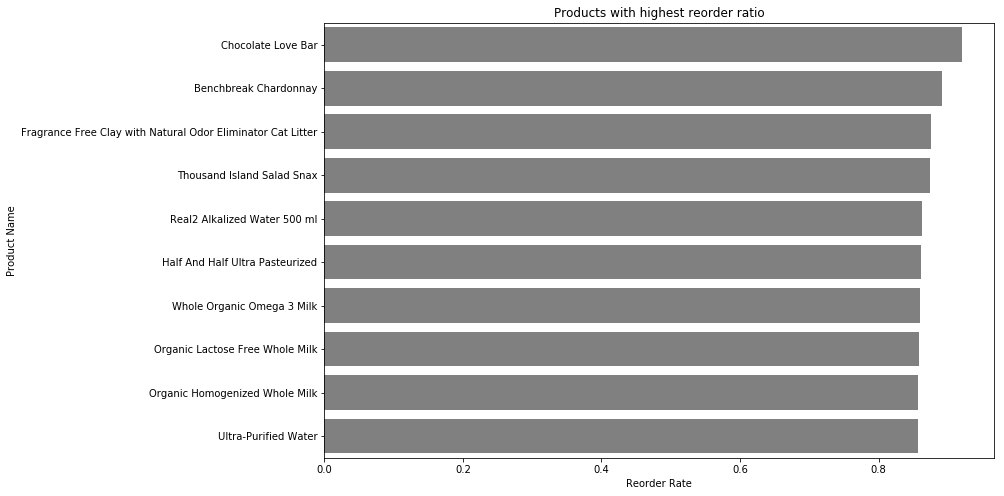

In [83]:
top = 10
plt.figure(figsize=(12, 8))
sns.barplot(high_reorder.reorder_rate[:top], high_reorder.product_name[:top], color = 'gray')
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Products with highest reorder ratio')
plt.show()

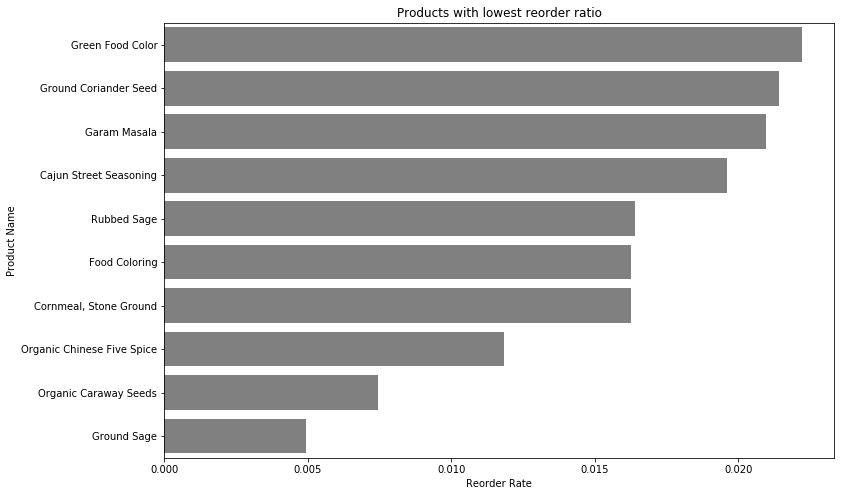

In [84]:
top = 10
plt.figure(figsize=(12, 8))
sns.barplot(high_reorder.reorder_rate[-top:], high_reorder.product_name[-top:], color = 'gray')
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Products with lowest reorder ratio')
plt.show()

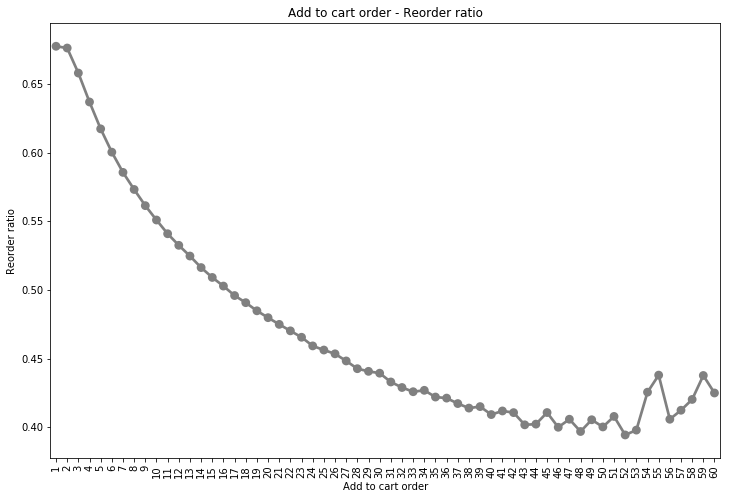

In [85]:
# Add to Cart - Reorder ratio:
orders_prior['add_to_cart_order_mod'] = orders_prior['add_to_cart_order'].copy()
grouped_df = orders_prior.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()
grouped_df = grouped_df[grouped_df.add_to_cart_order_mod <= 60]

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, color= 'gray')
plt.ylabel('Reorder ratio')
plt.xlabel('Add to cart order')
plt.title("Add to cart order - Reorder ratio")
plt.xticks(rotation='vertical')
plt.show()

# Sampling the data due to computing contraints ...

In [86]:
prioralldata.reordered[prioralldata.reordered == 1].count()/prioralldata.reordered.count()

0.5896974667922161

In [87]:
priorall = prioralldata.sample(10000)

# Check the sample

In [88]:
priorall.shape

(10000, 15)

In [89]:
priorall.reordered[priorall.reordered == 1].count()/priorall.reordered.count()

0.5853

In [90]:
#drop categorical data, only numerical data can go into machine learning algorithms
priorall.drop(['eval_set','product_name','department','aisle'], axis=1, inplace=True)
priorall.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
22338898,313499,71796,3,2,11,13.0,2748,1,1,84,16
13959725,2738816,177418,67,3,14,1.0,16759,5,1,83,4
1573750,3065709,20584,29,0,13,30.0,24852,8,1,24,4
24982854,2895169,107205,5,4,9,6.0,7043,17,0,43,3
15931288,375729,188049,1,1,12,0.0,5922,8,0,56,18


In [91]:
X = priorall.drop('reordered', axis=1).values
y = priorall['reordered'].values

In [92]:
print('X shape:',X.shape)
print('y shape:', y.shape)

X shape: (10000, 10)
y shape: (10000,)


In [93]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Due to computing constraints we have to reduce the data
#X_to_use, X_not_used, y_to_use, y_not_used = train_test_split(X, y,train_size=0.2,test_size=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2)

# checking the shapes
#print('X_to_use:', X_to_use.shape, X_to_use.dtype)
#print('y_to_use:', y_to_use.shape, y_to_use.dtype)
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

X_train: (8000, 10) float64
y_train: (8000,) int64
X_test: (2000, 10) float64
y_test: (2000,) int64


# Baseline

In [94]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class reorder(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X),1), dtype=bool)
    
reorder_clf = reorder()
print ('Accuracy: {:.3f}'.format(cross_val_score(reorder_clf, X_train, y_train, cv=3, scoring = 'accuracy').sum()/3))

Accuracy: 0.587


In [95]:
pd.value_counts(y, normalize=True)

1    0.5853
0    0.4147
dtype: float64

# Stochastic Gradient Classifier

In [96]:
from sklearn.linear_model import SGDClassifier

# Create the estimator
sgd_clf = SGDClassifier(random_state=42)

# Fit the model to train data
sgd_clf.fit(X_train, y_train)

# Accuracy on test set
accuracy_sgd = sgd_clf.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_sgd))

Accuracy: 0.425


# K Nearest Neighbours

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create the StandardScaler
scaler = StandardScaler()

# Create k-NN classifier
knn = KNeighborsClassifier(algorithm='brute')


# Create the pipeline
pipe = Pipeline([('scaler', scaler),
                 ('knn', knn)])


pipe.fit(X_train, y_train)

# Evaluate on validation set
accuracy_knn = pipe.score(X_test, y_test)

# Print accuracy
print('k-nearest neighbors accuracy: {:.3f}'.format(accuracy_knn))

k-nearest neighbors accuracy: 0.640


Tuning **k** and **distance metric (L1 and L2)** using Grid Search

In [99]:
# Define a set of reasonable values
k_values = np.arange(5, 105, 5)
distance_types = [1,2]

# Save accuracy on validation set
test_scores = []

# Grid search
for k in k_values:
    for d in distance_types:
        # Set hyperparameters
        pipe.set_params(knn__n_neighbors = k, knn__p = d)
        
        # Fit a k-NN classifier
        pipe.fit(X_train, y_train)
        
        # Evaluate on test set
        accuracy = pipe.score(X_test, y_test)
        
        # Save accuracy
        test_scores.append({
            'n neighbors': k,
            'distance metric': d,
            'test accuracy': accuracy
        })
        
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='test accuracy', ascending=False).head()

,distance metric,n neighbors,test accuracy
14,1,40,0.6905
16,1,45,0.6880
26,1,70,0.6870
32,1,85,0.6865
18,1,50,0.6860


# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

# Create the estimator
logreg = LogisticRegression()

# Fit the model to train data
logreg.fit(X_train, y_train)

# Accuracy on test set
accuracy_logreg = logreg.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_logreg))

Accuracy: 0.577


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('logreg',LogisticRegression())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'logreg__C':[0.0001,0.1,1000],
    'logreg__solver':['saga']
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'logreg__C': [0.0001, 0.1, 1000], 'logreg__solver': ['saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
df = pd.DataFrame.from_items([
    ('alpha',grid_cv.cv_results_['param_logreg__C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,alpha,mean accuracy,standard deviation
2,1000,0.681500,0.005424
1,0.1,0.680625,0.005906
0,0.0001,0.587375,0.000031


In [103]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.6815  (std: 0.005423694917712271 ) with alpha: 1000


In [104]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [105]:
accuracy = grid_cv.score(X_test,y_test)

In [106]:
print('Logistic regression accuracy (test set):',accuracy)

Logistic regression accuracy (test set): 0.672


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# Fit the model to train data
dt.fit(X_train, y_train)

# Get score
accuracy_dt = dt.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt))

Accuracy: 0.686


In [108]:
from sklearn.tree import export_graphviz

# Export decision tree
dot_data = export_graphviz(dt, out_file=None,
                          filled=True, rounded=True, proportion=True
                          )

In [109]:
#import graphviz

#Display decision tree
#graphviz.Source(dot_data)

In [110]:
# Increasing depth
dt_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Fit the model to train data
dt_2.fit(X_train, y_train)

# Get score
accuracy_dt_2 = dt_2.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_2))

Accuracy: 0.686


In [111]:
# Increasing depth
dt_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model to train data
dt_3.fit(X_train, y_train)

# Get score
accuracy_dt_3 = dt_3.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_dt_3))

Accuracy: 0.701


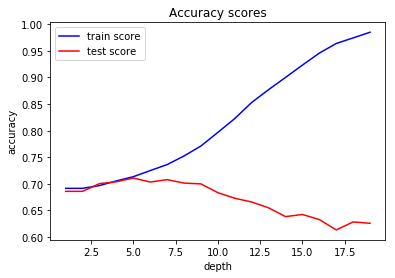

In [112]:
# Define a set of reasonable values
depth_values = np.arange(1,20,1)

# Save accuracy on validation set
train_scores = []
test_scores = []

# Grid search
for depth in depth_values:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    dt.fit(X_train,y_train)
    
    # Accuracy
    accuracy_train = dt.score(X_train,y_train)
    accuracy_test = dt.score(X_test,y_test)
    
    
    # Save train accuracy
    train_scores.append({
        'depth': depth,
        'accuracy': accuracy_train
    })

    
    # Save test accuracy
    test_scores.append({
        'depth': depth,
        'accuracy': accuracy_test
    })


# Create DataFrame with train scores
train_scores_df = pd.DataFrame(train_scores)    
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)

# Plot train and validation curve
plt.plot(train_scores_df['depth'],train_scores_df['accuracy'], color='blue',label='train score')
plt.plot(test_scores_df['depth'],test_scores_df['accuracy'], color='red',label='test score')
plt.title('Accuracy scores')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [113]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[0],
      ' with depth:',idx_max[1])

Top accuracy on test set: 0.711  with depth: 5.0


# Random Forests

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Create a decision tree
rf_1 = RandomForestClassifier(
    n_estimators=1, max_depth=5 , random_state=0)

# Fit estimator
rf_1.fit(X_train, y_train)

# Get score
accuracy_rf_1 = rf_1.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_1))

Accuracy: 0.660


In [115]:
# Create a random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None , random_state=0)

# Fit estimator
rf_10.fit(X_train, y_train)

# Get score
accuracy_rf_10 = rf_10.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_10))

Accuracy: 0.666


In [116]:
# Create a large random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None , random_state=0)

# Fit estimator
rf_200.fit(X_train, y_train)

# Get score
accuracy_rf_200 = rf_200.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_rf_200))

Accuracy: 0.704


In [117]:
# Create pipeline
pipe = Pipeline([
    ('scaler', None),
    ('randomforest',RandomForestClassifier())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'scaler': [StandardScaler()],
    'randomforest__n_estimators':[1,10,100,1000],
    'randomforest__max_depth':[None],
    'randomforest__random_state':[0]
}],cv=3)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
           ..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True)], 'randomforest__n_estimators': [1, 10, 100, 1000], 'randomforest__max_depth': [None], 'randomforest__random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
df = pd.DataFrame.from_items([
    ('n_estimators',grid_cv.cv_results_['param_randomforest__n_estimators']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,n_estimators,mean accuracy,standard deviation
3,1000,0.705875,0.007155
2,100,0.703125,0.009951
1,10,0.669125,0.007236
0,1,0.608875,0.012836


In [119]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with alpha:',idx_max[0])

Top accuracy across folds: 0.705875  (std: 0.007154907245755626 ) with alpha: 1000


In [120]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [121]:
accuracy = grid_cv.score(X_test,y_test)

In [122]:
print('Random Forest Classifier accuracy (test set):',accuracy)

Random Forest Classifier accuracy (test set): 0.7125


In [123]:
from sklearn.ensemble import RandomForestClassifier

# Define a set of reasonable values
n_trees = np.arange(50,401,50)

# Save accuracy on test set

test_scores = []

# Grid search
for ensemble in n_trees:
    rf = RandomForestClassifier(n_estimators=ensemble, max_depth=None, random_state=0 )
    rf.fit(X_train,y_train)
    
    # Accuracy
    accuracy_test = rf.score(X_test,y_test)
    
    # Save validation accuracy
    test_scores.append({
        'n estimators': ensemble,
        'test accuracy': accuracy_test
    })
    
# Create DataFrame with validation scores
test_scores_df = pd.DataFrame(test_scores)

test_scores_df.head(10)

,n estimators,test accuracy
0,50,0.7000
1,100,0.7010
2,150,0.7050
3,200,0.7040
4,250,0.7080
5,300,0.7095
6,350,0.7075
7,400,0.7105


In [124]:
# Best combination
idx_max = test_scores_df.loc[test_scores_df['test accuracy'].idxmax()]

print('Top accuracy on test set:',idx_max[1],
      ' with n estimators:',idx_max[0])

Top accuracy on test set: 0.7105  with n estimators: 400.0


In [126]:
# Fitting the tuned estimators on the entire train set
rf = RandomForestClassifier(n_estimators=400, max_depth=None, random_state=0 )
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.7105

# SVM

### SVM classifier with a linear kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create cross validation object
grid_cv = GridSearchCV(SVC(kernel='linear'), {'C': [0.01]}, cv=3)

# Fit estimator
grid_cv.fit(X_train, y_train)

# Get the results
grid_cv.cv_results_.keys()

# Collect results in a DataFrame
df = pd.DataFrame.from_items([
    ('C', grid_cv.cv_results_['param_C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy', ascending=False)


In [ ]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Linear SVM - top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2], ') with C:',idx_max[0])

### SVM classifier with a RBF kernel

In [ ]:
# Create cross validation object
grid_cv_rbf = GridSearchCV(SVC(kernel='rbf'), {'C': [1], 'gamma':[0.0001,0.001]}, cv=5)

# Fit estimator
grid_cv_rbf.fit(X_train, y_train)

# Get the results
grid_cv_rbf.cv_results_.keys()

In [ ]:
# Collect results in a DataFrame
df_rbf = pd.DataFrame.from_items([
    ('C', grid_cv_rbf.cv_results_['param_C']),
    ('gamma',grid_cv_rbf.cv_results_['param_gamma']),
    ('mean accuracy',grid_cv_rbf.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv_rbf.cv_results_['std_test_score'])
])
df_rbf.sort_values(by='mean accuracy', ascending=False).head()

In [ ]:
# Best combination
idx_max = df_rbf.loc[df_rbf['mean accuracy'].idxmax()]

print('RBF SVM - top accuracy across folds:',idx_max[2],
      ' (std:',idx_max[3], ') with C:',idx_max[0],'and gamma:',idx_max[1])